In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:

#DataFrame con nuestros datos
df = pd.read_csv('octavos.csv')
df.head(30)

,Equipo 1,Agr.,Equipo 2,Ida,Vuelta,Temporada
0,Leipzig,1–8,Manchester City,1–1,0–7,22/23
1,Brujas,1–7,Benfica,0–2,1–5,22/23
2,Liverpool,2–6,Real Madrid,2–5,0–1,22/23
3,Milan,1–0,Tottenham Hotspur,1–0,0–0,22/23
4,Eintracht Fráncfort,0–5,Napoli,0–2,0–3,22/23
5,Borussia Dortmund,1–2,Chelsea,1–0,0–2,22/23
6,Inter de Milán,1–0,Porto,1–0,0–0,22/23
7,París Saint-Germain,0–3,Bayern Múnich,0–1,0–2,22/23
8,Salzburgo,2–8,Bayern Múnich,1–1,1–7,21/22
9,Sporting de Portugal,0–5,Manchester City,0–5,0–0,21/22


In [31]:
#Valores nulos
print(df.isnull().sum())

Equipo 1     0
Agr.         0
Equipo 2     0
Ida          0
Vuelta       0
Temporada    0
dtype: int64


In [32]:
df.head()

,Equipo 1,Agr.,Equipo 2,Ida,Vuelta,Temporada
0,Leipzig,1–8,Manchester City,1–1,0–7,22/23
1,Brujas,1–7,Benfica,0–2,1–5,22/23
2,Liverpool,2–6,Real Madrid,2–5,0–1,22/23
3,Milan,1–0,Tottenham Hotspur,1–0,0–0,22/23
4,Eintracht Fráncfort,0–5,Napoli,0–2,0–3,22/23


In [33]:
nan_cols = df.isna().sum()
df.dropna(subset=nan_cols[nan_cols > 0].index, inplace=True)
df.isna().sum()

Equipo 1     0
Agr.         0
Equipo 2     0
Ida          0
Vuelta       0
Temporada    0
dtype: int64

In [34]:
df.head()

,Equipo 1,Agr.,Equipo 2,Ida,Vuelta,Temporada
0,Leipzig,1–8,Manchester City,1–1,0–7,22/23
1,Brujas,1–7,Benfica,0–2,1–5,22/23
2,Liverpool,2–6,Real Madrid,2–5,0–1,22/23
3,Milan,1–0,Tottenham Hotspur,1–0,0–0,22/23
4,Eintracht Fráncfort,0–5,Napoli,0–2,0–3,22/23


In [35]:
#Separamos la columna Agr. en dos columnas 'goles1' y 'goles2'
df[['goles_1','goles_2']] = df['Agr.'].str.split('–',expand=True)
df[['goles_ida_1','goles_ida_2']] = df['Ida'].str.split('–',expand=True)
df[['goles_vuelta_2','goles_vuelta_1']] = df['Vuelta'].str.split('–',expand=True)


df.head()

,Equipo 1,Agr.,Equipo 2,Ida,Vuelta,Temporada,goles_1,goles_2,goles_ida_1,goles_ida_2,goles_vuelta_2,goles_vuelta_1
0,Leipzig,1–8,Manchester City,1–1,0–7,22/23,1,8,1,1,0,7
1,Brujas,1–7,Benfica,0–2,1–5,22/23,1,7,0,2,1,5
2,Liverpool,2–6,Real Madrid,2–5,0–1,22/23,2,6,2,5,0,1
3,Milan,1–0,Tottenham Hotspur,1–0,0–0,22/23,1,0,1,0,0,0
4,Eintracht Fráncfort,0–5,Napoli,0–2,0–3,22/23,0,5,0,2,0,3


In [36]:
columns_to_drop = ['Agr.', 'Ida', 'Vuelta']

# Verificar si todas las columnas existen antes de eliminar
if all(column in df.columns for column in columns_to_drop):
    df.drop(columns=columns_to_drop, inplace=True)
    print("Columnas eliminadas con éxito.")
else:
    print("Al menos una columna no se encuentra en el DataFrame.")

df.head(90
        )

Columnas eliminadas con éxito.


,Equipo 1,Equipo 2,Temporada,goles_1,goles_2,goles_ida_1,goles_ida_2,goles_vuelta_2,goles_vuelta_1
0,Leipzig,Manchester City,22/23,1,8,1,1,0,7
1,Brujas,Benfica,22/23,1,7,0,2,1,5
2,Liverpool,Real Madrid,22/23,2,6,2,5,0,1
3,Milan,Tottenham Hotspur,22/23,1,0,1,0,0,0
4,Eintracht Fráncfort,Napoli,22/23,0,5,0,2,0,3
...,...,...,...,...,...,...,...,...,...
75,Real Madrid,Manchester United,12/13,3,2,1,1,1,2
76,Porto,Málaga,12/13,1,2,1,0,2,0
77,Arsenal,Bayern Múnich,12/13,3,3,1,3,0,2
78,Galatasaray,Schalke 04,12/13,4,3,1,1,2,3


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Equipo 1        80 non-null     object
 1   Equipo 2        80 non-null     object
 2   Temporada       80 non-null     object
 3   goles_1         80 non-null     object
 4   goles_2         80 non-null     object
 5   goles_ida_1     80 non-null     object
 6   goles_ida_2     80 non-null     object
 7   goles_vuelta_2  80 non-null     object
 8   goles_vuelta_1  80 non-null     object
dtypes: object(9)
memory usage: 5.8+ KB


In [38]:
#Transforamos las columnas a tipo int
colum_transform = ['goles_1', 'goles_2', 'goles_ida_1', 'goles_ida_2', 'goles_vuelta_1', 'goles_vuelta_2']
df[colum_transform] = df[colum_transform].apply(pd.to_numeric, errors='coerce', axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Equipo 1        80 non-null     object
 1   Equipo 2        80 non-null     object
 2   Temporada       80 non-null     object
 3   goles_1         80 non-null     int64 
 4   goles_2         80 non-null     int64 
 5   goles_ida_1     80 non-null     int64 
 6   goles_ida_2     80 non-null     int64 
 7   goles_vuelta_2  80 non-null     int64 
 8   goles_vuelta_1  80 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 5.8+ KB


In [39]:
print(df.isnull().sum())

Equipo 1          0
Equipo 2          0
Temporada         0
goles_1           0
goles_2           0
goles_ida_1       0
goles_ida_2       0
goles_vuelta_2    0
goles_vuelta_1    0
dtype: int64


In [142]:
#Guardar el df en un archivo csv llamado octavos_df.csv
df.to_csv('octavos_df.csv', index=False)

VISUALIZACIÓN DE LOS DATOS 

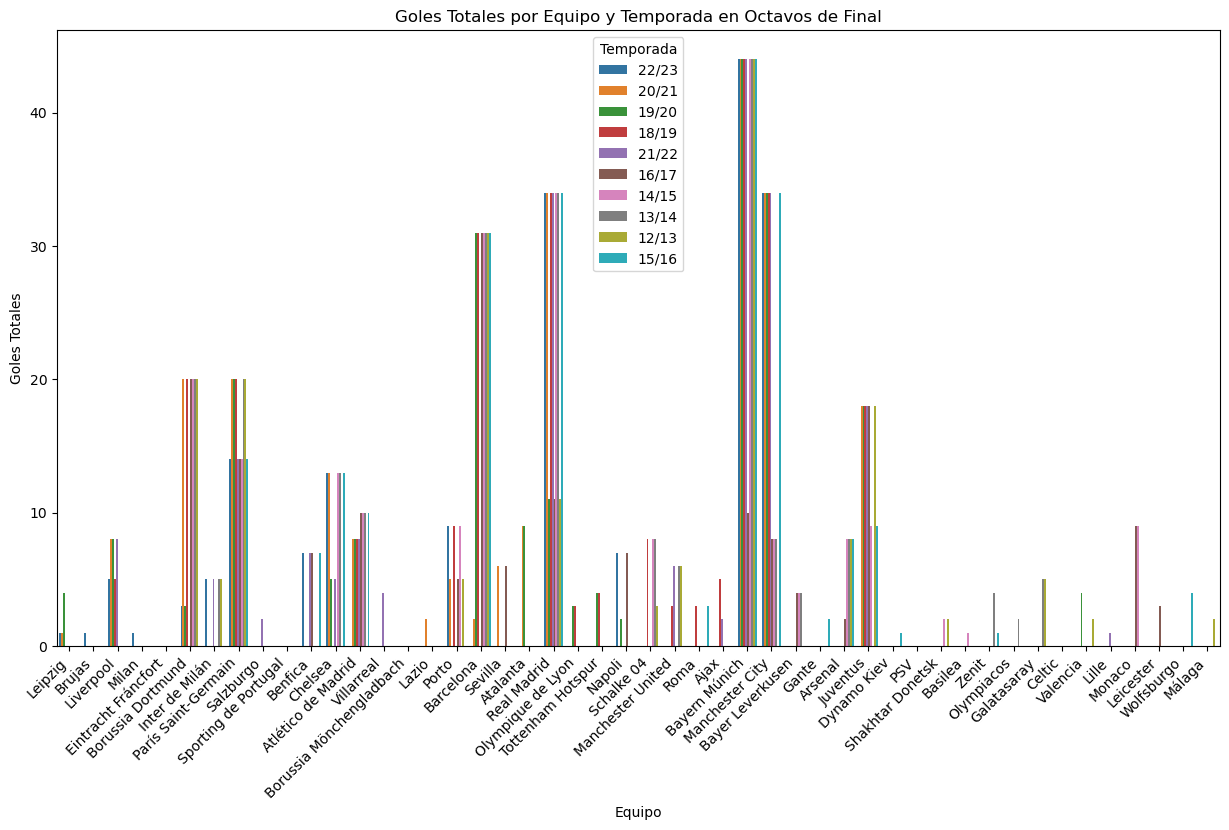

In [47]:
# Crear una lista con los nombres únicos de los equipos en las columnas 'Equipo 1' y 'Equipo 2'
equipos_unicos = pd.unique(df[['Equipo 1', 'Equipo 2']].values.ravel('K'))

# Inicializar un DataFrame para almacenar los goles totales por equipo y temporada
goles_totales_por_equipo_temporada = pd.DataFrame(columns=['Temporada', 'Equipo', 'Goles_totales'])

# Iterar sobre cada equipo único
for equipo in equipos_unicos:
    # Filtrar las filas donde el equipo está en 'Equipo 1'
    filas_equipo_1 = df[df['Equipo 1'] == equipo]
    goles_totales_1 = filas_equipo_1['goles_1'].sum()

    # Filtrar las filas donde el equipo está en 'Equipo 2'
    filas_equipo_2 = df[df['Equipo 2'] == equipo]
    goles_totales_2 = filas_equipo_2['goles_2'].sum()

    # Concatenar los resultados en el DataFrame principal
    goles_totales_por_equipo_temporada = pd.concat([goles_totales_por_equipo_temporada,
                                                    pd.DataFrame({'Temporada': filas_equipo_1['Temporada'].tolist(),
                                                                  'Equipo': [equipo] * len(filas_equipo_1),
                                                                  'Goles_totales': goles_totales_1})])
    goles_totales_por_equipo_temporada = pd.concat([goles_totales_por_equipo_temporada,
                                                    pd.DataFrame({'Temporada': filas_equipo_2['Temporada'].tolist(),
                                                                  'Equipo': [equipo] * len(filas_equipo_2),
                                                                  'Goles_totales': goles_totales_2})])

# Graficar los goles totales por equipo y temporada
plt.figure(figsize=(15, 8))
sns.barplot(x='Equipo', y='Goles_totales', hue='Temporada', data=goles_totales_por_equipo_temporada)
plt.title('Goles Totales por Equipo y Temporada en Octavos de Final')
plt.xlabel('Equipo')
plt.ylabel('Goles Totales')
plt.xticks(rotation=45, ha='right')
plt.show()




